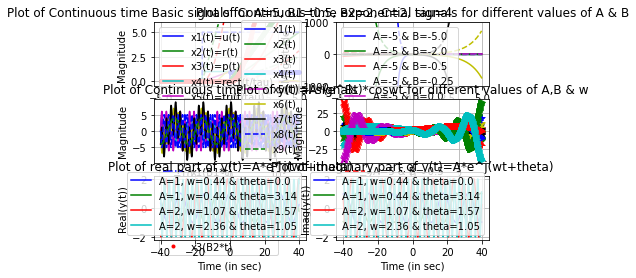

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Basic signals

# Function definitions of continuous time unit step, ramp, parabolic, rectangular, triangular and sinc signals
def step(t):
    temp = np.zeros(len(t))
    temp[t>=0] = 1
    temp[t<0] = 0
    return temp

def ramp(t):
    temp = np.zeros(len(t))
    temp[t>=0] = 1
    temp[t<0] = 0
    temp2 = np.multiply(t,temp)
    return temp2

def parabolic(t):
    temp = np.zeros(len(t))
    temp[t>=0] = 1
    temp[t<0] = 0
    t_sq = np.multiply(t,t)
    temp2 = 0.5*np.multiply(t_sq,temp)
    return temp2

def rect(t,tau):
    temp = np.zeros(len(t))
    temp[(t>=(-tau/2)) & (t<=(tau/2))] = 1
    return temp
    
def triangular(t,tau):
    temp = np.zeros(len(t))
    temp[(t>=(-tau/2)) & (t<=(tau/2))] = 1-(abs(t[(t>=(-tau/2)) & (t<=(tau/2))])/(tau/2))
    return temp

def sinc(t):
    temp = np.zeros(len(t))
    temp[t!=0] = np.sin(np.pi*t[t!=0])/(np.pi*t[t!=0])
    temp[t==0] = 1
    return temp



labels1 = ['x1(t)=u(t)','x2(t)=r(t)','x3(t)=p(t)','x4(t)=rect(t/tau)','x5(t)=tri(t/tau)','x6(t)=sinct','A*x1(t+C)','A*x2(t+C)','A*x3(t+C)','x1(B1*t)','x2(B1*t)','x3(B1*t)','x1(B2*t)','x2(B2*t)','x3(B2*t)']
colors1 = ['b-','g-','r-','c-','m-','y-','b--','g--','r--','b-.','g-.','r-.','b.','g.','r.']    

# Time t
t1 = np.arange(-5,5,0.01)

# x1(t) = u(t)
x11 = step(t1)

# x2(t) = r(t)
x12 = ramp(t1)

# x3(t) = p(t)
x13 = parabolic(t1)

# x4(t) = rect(t/tau)
tau1 = 4
x14 = rect(t1,tau1)

# x5(t) = tri(t/tau)
x15 = triangular(t1,tau1)

# x6(t) = sinc(t)
x16 = sinc(t1)


# A*x1(t+c), A*x2(t+c), A*x3(t+c),
A1 = 5
C1 = 2
x11_at = A1*step(t1+C1)
x12_at = A1*ramp(t1+C1)
x13_at = A1*parabolic(t1+C1)


# x1(Bt), x2(Bt), x3(Bt) for B=0.5
B1 = np.array([0.5,2])
x11_t1 = step(t1*B1[0])
x12_t1 = ramp(t1*B1[0])
x13_t1 = parabolic(t1*B1[0])


# x1(Bt), x2(Bt), x3(Bt) for B=2
x11_t2 = step(t1*B1[1])
x12_t2 = ramp(t1*B1[1])
x13_t2 = parabolic(t1*B1[1])

# Reshaping the signal from shape n to shape nx1
x11 = x11.reshape((t1.shape[0],1))
x12 = x12.reshape((t1.shape[0],1))
x13 = x13.reshape((t1.shape[0],1))
x14 = x14.reshape((t1.shape[0],1))
x15 = x15.reshape((t1.shape[0],1))
x16 = x16.reshape((t1.shape[0],1))
x11_at = x11_at.reshape((t1.shape[0],1))
x12_at = x12_at.reshape((t1.shape[0],1))
x13_at = x13_at.reshape((t1.shape[0],1))
x11_t1 = x11_t1.reshape((t1.shape[0],1))
x12_t1 = x12_t1.reshape((t1.shape[0],1))
x13_t1 = x13_t1.reshape((t1.shape[0],1))
x11_t2 = x11_t2.reshape((t1.shape[0],1))
x12_t2 = x12_t2.reshape((t1.shape[0],1))
x13_t2 = x13_t2.reshape((t1.shape[0],1))

# Concatenating all the basic signals into a single matrix
X1 = np.concatenate((x11,x12,x13,x14,x15,x16,x11_at,x12_at,x13_at,x11_t1,x12_t1,x13_t1,x11_t2,x12_t2,x13_t2),axis=1)

# Plotting the continuous time basic signals
fig,ax = plt.subplots(3,2)
for i in range(X1.shape[1]):
    ax[0,0].plot(t1,X1[:,i],colors1[i],label=labels1[i])
ax[0,0].set_title('Plot of Continuous time Basic signals for A=5, B1=0.5, B2=2, C=2, tau=4')
ax[0,0].set_xlabel('Time (in sec)')
ax[0,0].set_ylabel('Magnitude')
ax[0,0].set_ylim(-0.5,6)
ax[0,0].legend(loc='upper left')
ax[0,0].grid()
    

# Exponentials

# Time (t)
t2 = np.arange(-5,5,0.01)
X2 = np.empty([len(t2),1])
A2 = np.array([-5,5])
B2 = np.array([-5,-2,-0.5,-0.25,0,1,2])

labels2 = []
colors2 = ['b-','g-','r-','c-','m-','y-','k-','b--','g--','r--','c--','m--','y--','k--'] 

# Generating the list of labels from logic
# Generating the signals and appending each signal to a single matrix
for i in range(len(A2)):
    for j in range(len(B2)):
        temp_l = 'A='+str(A2[i])+' & '+'B='+str(B2[j])
        labels2.append(temp_l)
        temp = A2[i]*np.exp(B2[j]*t2)
        temp = temp.reshape(len(temp),1)
        if i==0 and j==0:
            X2 = temp
        else:
            X2 = np.append(X2,temp,axis=1)


# Plotting the continuous time exponential signals
for i in range(X2.shape[1]):
    ax[0,1].plot(t2,X2[:,i],colors2[i],label=labels2[i])
ax[0,1].set_title('Plot of Continuous time exponential signals for different values of A & B')
ax[0,1].set_xlabel('Time (in sec)')
ax[0,1].set_ylabel('Magnitude')
ax[0,1].set_ylim(-10**3,10**3)
ax[0,1].legend(loc='upper left')
ax[0,1].grid()
 

           
# Sinuisoids

# Time(t)
t3 = np.arange(-15,15,0.05)

# Generating all the sinuisoindal signals
x31 = 5*np.sin(2*np.pi*t3)
x32 = 2*np.sin((2*np.pi/3)*t3)
x33 = 4*np.cos((np.pi/3)*t3)
x34 = 3*np.cos((2*np.pi*t3)+(np.pi/3))
x35 = x31 + x32
x36 = x33 + x34
x37 = x31 + x33
x38 = 5*np.sin(2*np.pi*(-t3))
x39 = 4*np.cos((np.pi/3)*(-t3))

# Reshaping the signals from shape n to shape nx1
x31 = x31.reshape((t3.shape[0],1))
x32 = x32.reshape((t3.shape[0],1))
x33 = x33.reshape((t3.shape[0],1))
x34 = x34.reshape((t3.shape[0],1))
x35 = x35.reshape((t3.shape[0],1))
x36 = x36.reshape((t3.shape[0],1))
x37 = x37.reshape((t3.shape[0],1))
x38 = x38.reshape((t3.shape[0],1))
x39 = x39.reshape((t3.shape[0],1))

# Concatenating all the sinuisoidal signals into a single matrix
X3 = np.concatenate((x31,x32,x33,x34,x35,x36,x37,x38,x39),axis=1)


# Plotting the continuous time sinuisoidal signals
labels3 = ['x1(t)','x2(t)','x3(t)','x4(t)','x5(t)','x6(t)','x7(t)','x8(t)','x9(t)']
colors3 = ['b-','g-','r-','c-','m-','y-','k-','b--','g--'] 
for i in range(X3.shape[1]):
    ax[1,0].plot(t3,X3[:,i],colors3[i],label=labels3[i])
ax[1,0].set_title('Plot of Continuous time sinuisoidal signals')
ax[1,0].set_xlabel('Time (in sec)')
ax[1,0].set_ylabel('Magnitude')
ax[1,0].legend()
ax[1,0].grid()

# Complex exponentials

# Time range (t)
t4 = np.arange(-3,3,0.01)
X4 = np.empty([len(t4),1])
A4 = np.array([0.1,0.5,1,2])
B4 = np.array([-0.25,-0.5,-1,0.5,1])
w4 = np.pi*np.array([2,1/6,5/3])
labels4 = []
colors4 = []
temp_c1 = ['b','g','r','c','m','y','k']
temp_c2 = ['-','--','-.','.','o','*','+','x','>']
count = 0

# Generating different styles of colors to represent different plots on single plot
for i in range(len(temp_c2)):
    for j in range(len(temp_c1)):
        count += 1
        if count<=60:
            temp = temp_c1[j] + temp_c2[i]
            colors4.append(temp)
        else:
            continue

# Generating different labels to represent different plots on single plot
for i in range(len(A4)):
    for j in range(len(B4)):
        for k in range(len(w4)):
            temp_l = 'A='+str(A4[i])+', '+'B='+str(B4[j])+' & '+'w='+str(round(w4[k],2))
            labels4.append(temp_l)
            temp = A4[i]*np.exp(B4[j]*t4)*np.cos(w4[k]*t4)
            temp = temp.reshape(len(temp),1)
            if i==0 and j==0 and k==0:
                X4 = temp
            else:
                X4 = np.append(X4,temp,axis=1)


# Plotting the continuous time complex exponential signals                
for i in range(X4.shape[1]):
    ax[1,1].plot(t4,X4[:,i],colors4[i],label=labels4[i])
ax[1,1].set_title('Plot of y(t)=A*(e^Bt)*coswt for different values of A,B & w')
ax[1,1].set_xlabel('Time (in sec)')
ax[1,1].set_ylabel('Magnitude')
# ax[1,1].legend(loc='lower left')
ax[1,1].grid()
            

# Time (t)
t5 = np.arange(-40,40,0.2)
X5 = np.empty([len(t5),1])
A5 = np.array([1,1,2,2])
w5 = np.pi*np.array([0.14,0.14,0.34,0.75])  
th5 = np.pi*np.array([0,1,0.5,1/3])  
labels5 = []
colors5 = ['b','g','r','c']

# Generating different labels to represent different plots on single plot
# Generating different complex exponential signals and appending them into a single matrix
for i in range(len(w5)):
    temp_l = 'A='+str(A5[i])+', '+'w='+str(round(w5[i],2))+' & '+'theta='+str(round(th5[i],2))
    labels5.append(temp_l)
    temp1 = (w5[i]*t5)+th5[i]
    temp2 = A5[i]*np.exp(temp1*1j)
    temp2 = temp2.reshape(len(temp2),1)
    if i==0:
        X5 = temp2
    else:
        X5 = np.append(X5,temp2,axis=1)  

# Extracting the real and imaginary parts of complex exponential signals
X5_re = np.real(X5)
X5_im = np.imag(X5)

# Plotting the real and imaginary parts of continuous time complex exponential signals
for i in range(X5.shape[1]):
    ax[2,0].plot(t5,X5_re[:,i],colors5[i],label=labels5[i])
    ax[2,1].plot(t5,X5_im[:,i],colors5[i],label=labels5[i])
ax[2,0].set_title('Plot of real part of y(t)=A*e^j(wt+theta)')
ax[2,0].set_xlabel('Time (in sec)')
ax[2,0].set_ylabel('Real(y(t))')
ax[2,0].legend(loc='lower right')
ax[2,0].grid()
ax[2,1].set_title('Plot of imaginary part of y(t)=A*e^j(wt+theta)')
ax[2,1].set_xlabel('Time (in sec)')
ax[2,1].set_ylabel('Imag(y(t))')
ax[2,1].legend(loc='lower right')
ax[2,1].grid()


<ipython-input-2-a3092789395d>:404: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[j,0].stem(t5,X5_re[:,j])
<ipython-input-2-a3092789395d>:405: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[j,1].stem(t5,X5_im[:,j])
<ipython-input-2-a3092789395d>:404: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behav

The discrete counterparts of impulse signal, unit step signal, ramp signal and parabolic signal are related as follows:
1.Ramp signal can be obtained by taking difference between two consecutive samples of parabolic signal in discrete time domain
2.Unit step signal can be obtained by taking difference between two consecutive samples of ramp signal in discrete time domain
3.Impuse signal can be obtained by taking difference between two consecutive samples of unit step signal in discrete time domain


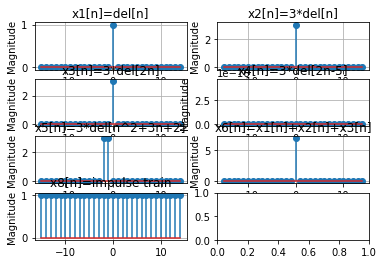

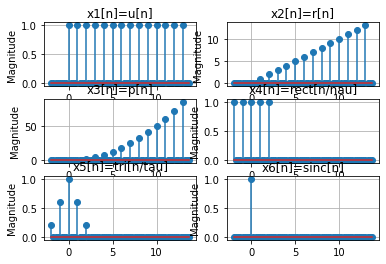

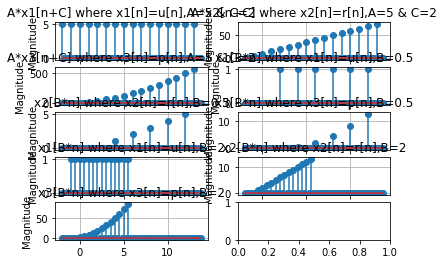

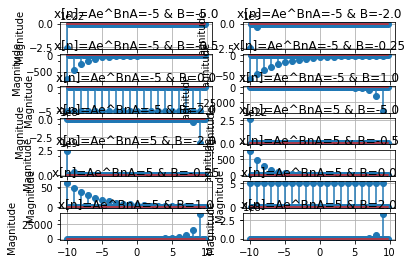

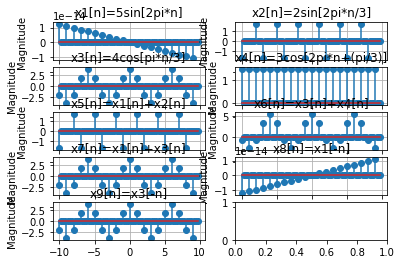

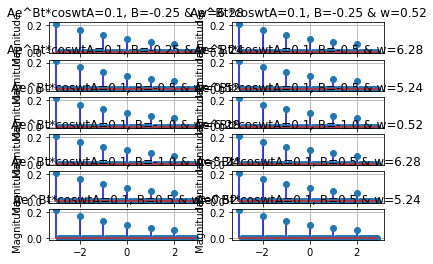

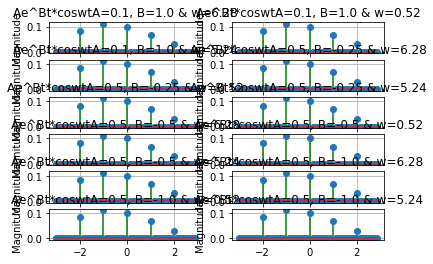

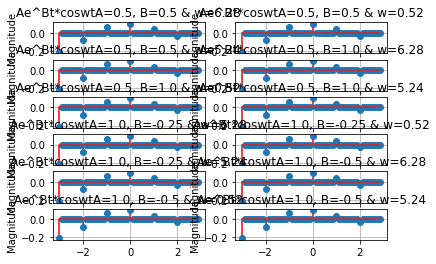

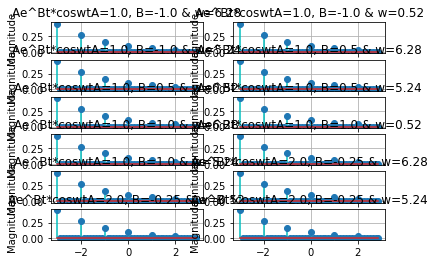

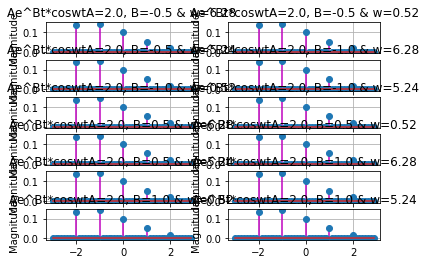

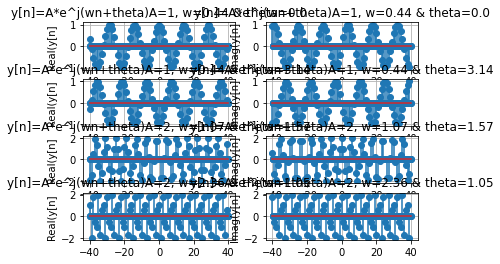

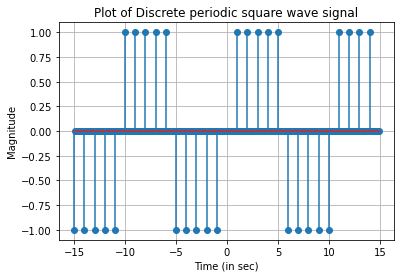

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Function definitions of impulse and impulse train signals
def impulse(n,init):
    temp = init.copy()
    temp[n==0] = 1
    return temp

def imp_train(n,k,init):
    temp1 = init.copy()
    for i in k:
        temp1 = impulse(n-i,temp1)
    return temp1

labels01 = ['x1[n]=del[n]','x2[n]=3*del[n]','x3[n]=3*del[2n]','x4[n]=3*del[2n-5]','x5[n]=3*del[n^2+3n+2]','x6[n]=x1[n]+x2[n]+x3[n]','x8[n]=impulse train']


# Generating different impulse signals
n1 = np.arange(-15,15,1)
init0 = np.zeros(len(n1))
x1 = impulse(n1,init0)
x2 = 3*impulse(n1,init0)
x3 = 3*impulse(2*n1,init0)
x4 = 3*impulse(2*n1-5,init0)
x5 = 3*impulse((n1**2)+(3*n1)+2,init0)
x6 = x1 + x2 + x3

k0 = np.arange(-15,15,1)
x8 = imp_train(n1,k0,init0)

# Reshaping the impulse signals from shape n to shape nx1
x1 = x1.reshape((n1.shape[0],1))
x2 = x2.reshape((n1.shape[0],1))
x3 = x3.reshape((n1.shape[0],1))
x4 = x4.reshape((n1.shape[0],1))
x5 = x5.reshape((n1.shape[0],1))
x6 = x6.reshape((n1.shape[0],1))
x8 = x8.reshape((n1.shape[0],1))

# Appending the impulse signals into a single matrix
X01 = np.concatenate((x1,x2,x3,x4,x5,x6,x8),axis=1)
fig,ax = plt.subplots(4,2)
i = 0
for j in range((X01.shape[1]+1)//2):
    for k in range(2):
        ax[j,k].stem(n1,X01[:,i],use_line_collection=True)
        ax[j,k].set_title(labels01[i])
        ax[j,k].set_xlabel('')
        ax[j,k].set_ylabel('Magnitude')
        # ax[0,0].set_ylim(-0.5,6)
        ax[j,k].grid()
        i+=1
        if i>X01.shape[1]-1:
            break
    if i>X01.shape[1]-1:
        break




# Basic signals

# Function definitions of discrete time unit step, ramp, parabolic, rectangular, triangular and sinc signals
def step(t):
    temp = np.zeros(len(t))
    temp[t>=0] = 1
    temp[t<0] = 0
    return temp

def ramp(t):
    temp = np.zeros(len(t))
    temp[t>=0] = 1
    temp[t<0] = 0
    temp2 = np.multiply(t,temp)
    return temp2

def parabolic(t):
    temp = np.zeros(len(t))
    temp[t>=0] = 1
    temp[t<0] = 0
    t_sq = np.multiply(t,t)
    temp2 = 0.5*np.multiply(t_sq,temp)
    return temp2

def rect(t,tau):
    temp = np.zeros(len(t))
    temp[(t>=(-tau/2)) & (t<=(tau/2))] = 1
    return temp
    
def triangular(t,tau):
    temp = np.zeros(len(t))
    temp[(t>=(-tau/2)) & (t<=(tau/2))] = 1-(abs(t[(t>=(-tau/2)) & (t<=(tau/2))])/(tau/2))
    return temp

def sinc(t):
    temp = np.zeros(len(t))
    temp[t!=0] = (np.sin(np.pi*t[t!=0]))/(np.pi*t[t!=0])
    temp[t==0] = 1
    return temp

def scale(x,k):
    if k>1:
        k1 = int(k)
        temp = np.zeros(len(x))
        temp = x[::k1]
        temp2 = np.zeros(int(len(x)/k1))
        temp1 = np.concatenate((temp,temp2))
    else:
        k1 = int(1/k)
        temp = np.zeros(k1*len(x))
        temp[::k1] = x
        temp_len = int(len(temp)/2)
        temp1 = temp[:temp_len]
    return temp1
        
        
    



labels02 = ['x1[n]=u[n]','x2[n]=r[n]','x3[n]=p[n]','x4[n]=rect[n/nau]','x5[n]=tri[n/tau]','x6[n]=sinc[n]']
labels03 = ['A*x1[n+C] where x1[n]=u[n],A=5 & C=2','A*x2[n+C] where x2[n]=r[n],A=5 & C=2','A*x3[n+C] where x3[n]=p[n],A=5 & C=2','x1[B*n] where x1[n]=u[n],B=0.5','x2[B*n] where x2[n]=r[n],B=0.5','x3[B*n] where x3[n]=p[n],B=0.5','x1[B*n] where x1[n]=u[n],B=2','x2[B*n] where x2[n]=r[n],B=2','x3[B*n] where x3[n]=p[n],B=2']



# Generating the discrete time basic signals  
t1 = np.arange(-2,14,0.25)
k1 = np.arange(-2,14,1)
init1 = np.zeros(len(t1))
it1 = imp_train(t1,k1,init1)
x11 = np.multiply(step(t1),it1)
x12 = np.multiply(ramp(t1),it1)
x13 = np.multiply(parabolic(t1),it1)
tau1 = 5
x14 = np.multiply(rect(t1,tau1),it1)
x15 = np.multiply(triangular(t1,tau1),it1)
x16 = np.multiply(sinc(t1),it1)

A1 = 5
C1 = 2
x11_at = np.multiply(A1*step(t1+C1),it1)
x12_at = np.multiply(A1*ramp(t1+C1),it1)
x13_at = np.multiply(A1*parabolic(t1+C1),it1)


B1 = np.array([0.5,2])
x11_t1 = scale(x11,B1[0])
x12_t1 = scale(x12,B1[0])
x13_t1 = scale(x13,B1[0])


x11_t2 = scale(x11,B1[1])
x12_t2 = scale(x12,B1[1])
x13_t2 = scale(x13,B1[1])

# Reshaping the basic signals from shape n to shape nx1
x11 = x11.reshape((t1.shape[0],1))
x12 = x12.reshape((t1.shape[0],1))
x13 = x13.reshape((t1.shape[0],1))
x14 = x14.reshape((t1.shape[0],1))
x15 = x15.reshape((t1.shape[0],1))
x16 = x16.reshape((t1.shape[0],1))
x11_at = x11_at.reshape((t1.shape[0],1))
x12_at = x12_at.reshape((t1.shape[0],1))
x13_at = x13_at.reshape((t1.shape[0],1))
x11_t1 = x11_t1.reshape((t1.shape[0],1))
x12_t1 = x12_t1.reshape((t1.shape[0],1))
x13_t1 = x13_t1.reshape((t1.shape[0],1))
x11_t2 = x11_t2.reshape((t1.shape[0],1))
x12_t2 = x12_t2.reshape((t1.shape[0],1))
x13_t2 = x13_t2.reshape((t1.shape[0],1))


# Concatenating the basic signals into matrices for easy plotting
X02 = np.concatenate((x11,x12,x13,x14,x15,x16),axis=1)
X03 = np.concatenate((x11_at,x12_at,x13_at,x11_t1,x12_t1,x13_t1,x11_t2,x12_t2,x13_t2),axis=1)

# Plotting the discrete time basic signals
i = 0
fig,ax = plt.subplots(3,2)
for j in range((X02.shape[1]+1)//2):
    for k in range(2):
        ax[j,k].stem(t1,X02[:,i],use_line_collection=True)
        ax[j,k].set_title(labels02[i])
        ax[j,k].set_xlabel('')
        ax[j,k].set_ylabel('Magnitude')
        # ax[0,1].set_ylim(-0.5,10)
        ax[j,k].grid()
        i += 1
        if i>X02.shape[1]-1:
            break
    if i>X02.shape[1]-1:
        break

i = 0
fig,ax = plt.subplots(5,2)
for j in range((X03.shape[1]+1)//2):
    for k in range(2):
        ax[j,k].stem(t1,X03[:,i],use_line_collection=True)
        ax[j,k].set_title(labels03[i])
        ax[j,k].set_xlabel('')
        ax[j,k].set_ylabel('Magnitude')
        # ax[0,1].set_ylim(-0.5,10)
        ax[j,k].grid()
        i += 1
        if i>X03.shape[1]-1:
            break
    if i>X03.shape[1]-1:
        break

# Exponentials

# Time (t)
t2 = np.arange(-10,10,0.25)
k2 = np.arange(-10,10,1)
init2 = np.zeros(len(t2))
it2 = imp_train(t2,k2,init2)
X2 = np.empty([len(t2),1])
A2 = np.array([-5,5])
B2 = np.array([-5,-2,-0.5,-0.25,0,1,2])

labels2 = []
 

# Generating labels to represent different exponential signals
# Generating different exponential signals
for i in range(len(A2)):
    for j in range(len(B2)):
        temp_l = str('x[n]=Ae^Bn') + 'A='+str(A2[i])+' & '+'B='+str(B2[j])
        labels2.append(temp_l)
        temp = np.multiply(A2[i]*np.exp(B2[j]*t2),it2)
        temp = temp.reshape(len(temp),1)
        if i==0 and j==0:
            X2 = temp
        else:
            X2 = np.append(X2,temp,axis=1)

# Plotting the discrete time exponential signals
fig,ax = plt.subplots(7,2)
i = 0
for j in range((X2.shape[1]+1)//2):
    for k in range(2):
        ax[j,k].stem(t2,X2[:,i],use_line_collection=True)
        ax[j,k].set_title(labels2[i])
        ax[j,k].set_xlabel('')
        ax[j,k].set_ylabel('Magnitude')
        # ax[1,0].set_ylim(-10**1,10**1)
        # ax[1,0].legend(loc='upper left')
        ax[j,k].grid()
        i+=1
        if i>X2.shape[1]-1:
            break
    if i>X2.shape[1]-1:
        break

# Sinuisoids

# Time (t)
t3 = np.arange(-10,10,0.25)
k3 = np.arange(-10,10,1)
init3 = np.zeros(len(t3))
it3 = imp_train(t3,k3,init3)

# Generating different sinuisoidal signals
x31 = np.multiply(5*np.sin(2*np.pi*t3),it3)
x32 = np.multiply(2*np.sin((2*np.pi/3)*t3),it3)
x33 = np.multiply(4*np.cos((np.pi/3)*t3),it3)
x34 = np.multiply(3*np.cos((2*np.pi*t3)+(np.pi/3)),it3)
x35 = x31 + x32
x36 = x33 + x34
x37 = x31 + x33
x38 = np.multiply(5*np.sin(2*np.pi*(-t3)),it3)
x39 = np.multiply(4*np.cos((np.pi/3)*(-t3)),it3)

# Reshaping the sinuisoidal signals from shape n to shape nx1
x31 = x31.reshape((t3.shape[0],1))
x32 = x32.reshape((t3.shape[0],1))
x33 = x33.reshape((t3.shape[0],1))
x34 = x34.reshape((t3.shape[0],1))
x35 = x35.reshape((t3.shape[0],1))
x36 = x36.reshape((t3.shape[0],1))
x37 = x37.reshape((t3.shape[0],1))
x38 = x38.reshape((t3.shape[0],1))
x39 = x39.reshape((t3.shape[0],1))

# Concatenating the sinuisoidal signals into a single matrix
X3 = np.concatenate((x31,x32,x33,x34,x35,x36,x37,x38,x39),axis=1)

labels3 = ['x1[n]=5sin[2pi*n]','x2[n]=2sin[2pi*n/3]','x3[n]=4cos[pi*n/3]','x4[n]=3cos[2pi*n+(pi/3)]','x5[n]=x1[n]+x2[n]','x6[n]=x3[n]+x4[n]','x7[n]=x1[n]+x3[n]','x8[n]=x1[-n]','x9[n]=x3[-n]']


# Plotting the discrete time sinuisoidal signals
fig,ax = plt.subplots(5,2)
i=0
for j in range((X3.shape[1]+1)//2):
    for k in range(2):
        ax[j,k].stem(t3,X3[:,i],use_line_collection=True)
        ax[j,k].set_title(labels3[i])
        ax[j,k].set_xlabel('')
        ax[j,k].set_ylabel('Magnitude')
        ax[j,k].grid()
        i+=1
        if i>X3.shape[1]-1:
            break
    if i>X3.shape[1]-1:
        break

# Complex exponentials

# Time (t)
t4 = np.arange(-3,3,0.125)
k4 = np.arange(-3,3,1)
init4 = np.zeros(len(t4))
it4 = imp_train(t4,k4,init4)
X4 = np.empty([len(t4),1])
A4 = np.array([0.1,0.5,1,2])
B4 = np.array([-0.25,-0.5,-1,0.5,1])
w4 = np.pi*np.array([2,1/6,5/3])
labels4 = []
colors4 = []
temp_c1 = ['b','g','r','c','m','y','k']
temp_c2 = ['-','--','-.','.','o','*','+','x','>']
count = 0

# Generating different colors to represent different complex exponential signal on a single plot
for i in range(len(temp_c2)):
    for j in range(len(temp_c1)):
        count += 1
        if count<=60:
            temp = temp_c1[j] + temp_c2[i]
            colors4.append(temp)
        else:
            continue

# Generating different labels to represent different complex exponential signal on a single plot 
# Generating different complex exponential signals   
for i in range(len(A4)):
    for j in range(len(B4)):
        for k in range(len(w4)):
            temp_l = str('Ae^Bt*coswt')+'A='+str(A4[i])+', '+'B='+str(B4[j])+' & '+'w='+str(round(w4[k],2))
            labels4.append(temp_l)
            temp = np.multiply(A4[i]*np.exp(B4[j]*t4)*np.cos(w4[k]*t4),it4)
            temp = temp.reshape(len(temp),1)
            if i==0 and j==0 and k==0:
                X4 = temp
            else:
                X4 = np.append(X4,temp,axis=1)
 
# Plotting the complex exponential signals  
p = 0
for i in range(5):
    fig,ax = plt.subplots(6,2)              
    for j in range(6):
        for k in range(2):
            ax[j,k].stem(t4,X4[:,i],colors4[i],label=labels4[i],use_line_collection=True)
            ax[j,k].set_title(labels4[p])
            ax[j,k].set_xlabel('')
            ax[j,k].set_ylabel('Magnitude')
            # ax[1,1].legend(loc='lower left')
            ax[j,k].grid()
            p+=1
        if i>X4.shape[1]-1:
            break
    if i>X4.shape[1]-1:
        break

            

# Time (t)
t5 = np.arange(-40,40,0.125)
k5 = np.arange(-40,40,1)
init5 = np.zeros(len(t5))
it5 = imp_train(t5,k5,init5)
X5 = np.empty([len(t5),1])
A5 = np.array([1,1,2,2])
w5 = np.pi*np.array([0.14,0.14,0.34,0.75])  
th5 = np.pi*np.array([0,1,0.5,1/3])  
labels5 = []


# Generating labels to represent different complex exponentials signals on a single plot
# Generating different complex exponential signals
for i in range(len(w5)):
    temp_l = str('y[n]=A*e^j(wn+theta)')+ 'A='+str(A5[i])+', '+'w='+str(round(w5[i],2))+' & '+'theta='+str(round(th5[i],2))
    labels5.append(temp_l)
    temp1 = (w5[i]*t5)+th5[i]
    temp2 = np.multiply(A5[i]*np.exp(temp1*1j),it5)
    temp2 = temp2.reshape(len(temp2),1)
    if i==0:
        X5 = temp2
    else:
        X5 = np.append(X5,temp2,axis=1)  

# Extracting the real and imaginary parts of complex exponential signals
X5_re = np.real(X5)
X5_im = np.imag(X5)

# Plotting the real and imaginary parts of discrete time complex exponential signals

fig,ax = plt.subplots(4,2) 
for j in range(4):
    ax[j,0].stem(t5,X5_re[:,j])
    ax[j,1].stem(t5,X5_im[:,j])
    ax[j,0].set_title(labels5[j])
    ax[j,0].set_xlabel('')
    ax[j,0].set_ylabel('Real(y[n]')
    ax[j,0].grid()
    ax[j,1].set_title(labels5[j])
    ax[j,1].set_xlabel('')
    ax[j,1].set_ylabel('Imag(y[n]')
    ax[j,1].grid()






print('The discrete counterparts of impulse signal, unit step signal, ramp signal and parabolic signal are related as follows:')
print('1.Ramp signal can be obtained by taking difference between two consecutive samples of parabolic signal in discrete time domain')
print('2.Unit step signal can be obtained by taking difference between two consecutive samples of ramp signal in discrete time domain')
print('3.Impuse signal can be obtained by taking difference between two consecutive samples of unit step signal in discrete time domain')



# Discrete time periodic square wave signal

# Time (t)
t6 = np.arange(-15,15,0.125)
k6 = np.arange(-15,15,1)
init6 = np.zeros(len(t6))
it6 = imp_train(t6,k6,init6)

# Generating the discrete time periodic square wave signal from sinuisoidal signals
x61 = np.sin(np.pi*t6/5)
x62 = np.zeros(len(t6))
x62[x61>0] = 1
x62[x61<0] = -1
x62[x61==0] = 0
x6 = np.multiply(x62,it6)

fig,ax = plt.subplots() 
# Plotting the discrete time periodic square wave signal
ax.stem(t6,x6,use_line_collection=True)
ax.set_title('Plot of Discrete periodic square wave signal')
ax.set_xlabel('Time (in sec)')
ax.set_ylabel('Magnitude')
ax.grid()

The convolution of sequence x[n] and h[n] is y[n] = [ 16.+0.j  22.+0.j  28.+0.j   7.+0.j  66.+0.j -27.+0.j  28.+0.j]
The impulse response of y[n]=2x[n-3] is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
The response of the system to step input is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The response of the system to ramp input is [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  4.
  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]
The response of the system to parabolic input is [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   1.   4.   9.  16

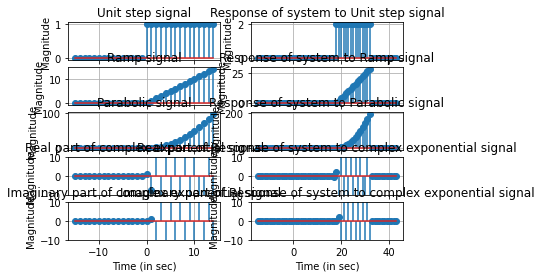

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions of impulse, step, ramp and parabolic signals

def impulse(n,init):
    temp = init.copy()
    temp[n==0] = 1
    return temp

def step(t):
    temp = np.zeros(len(t))
    temp[t>=0] = 1
    temp[t<0] = 0
    return temp

def ramp(t):
    temp = np.zeros(len(t))
    temp[t>=0] = 1
    temp[t<0] = 0
    temp2 = np.multiply(t,temp)
    return temp2

def parabolic(t):
    temp = np.zeros(len(t))
    temp[t>=0] = 1
    temp[t<0] = 0
    t_sq = np.multiply(t,t)
    temp2 = 0.5*np.multiply(t_sq,temp)
    return temp2


# Convolution

# Function definition of convolution operation
def convolution(inputSeq,impulseResponse):
    out_seq = np.zeros(len(inputSeq)+len(impulseResponse)-1,dtype=complex)
    for i in range(len(out_seq)):
        for j in range(len(inputSeq)):
            for k in range(len(impulseResponse)):
                if j+k==i:
                    out_seq[i] += inputSeq[j]*impulseResponse[k]
                elif j+k<i:
                    continue
                elif j+k>i:
                    break
    return out_seq

# Implementing the convolution for give input and impulse signals
x1 = np.array([2,4,5,2,7])
h1 = np.array([8,-5,4])
y1 = convolution(x1,h1)
print('The convolution of sequence x[n] and h[n] is y[n] =', y1)



# Impulse response of y[n]=2x[n-3]
n2 = np.arange(-15,15,1)
init2 = np.zeros(len(n2))
h2 = 2*impulse(n2-3,init2)
print('The impulse response of y[n]=2x[n-3] is', h2)

# Generating step, ramp, parabolic and complex exponential signals
u2 = step(n2)
r2 = ramp(n2)
p2 = parabolic(n2)
c2 = np.exp((2+3j)*n2)

# Calcularing the Responses of given system (h[n]) to step, ramp, parabolic and complex exponential signals
y21 = np.real(convolution(u2,h2))
print('The response of the system to step input is', y21)
y22 = np.real(convolution(r2,h2))
print('The response of the system to ramp input is', y22)
y23 = np.real(convolution(p2,h2))
print('The response of the system to parabolic input is', y23)
y24 = convolution(c2,h2)
print('The response of the system to complex exponential input is', y24)
y24_real = np.real(convolution(c2,h2))
y24_imag = np.imag(convolution(c2,h2))


# Reshaping the basic signals and their responses from shape n to shape nx1
u2 = u2.reshape((len(u2),1))
r2 = r2.reshape((len(r2),1))
p2 = p2.reshape((len(p2),1))
c2_real = np.real(c2).reshape((len(c2),1))
c2_imag = np.imag(c2).reshape((len(c2),1))
y21 = y21.reshape((len(y21),1))
y22 = y22.reshape((len(y22),1))
y23 = y23.reshape((len(y23),1))
y24_real = y24_real.reshape((len(y24.real),1))
y24_imag = y24_imag.reshape((len(y24.imag),1))

# Concatenating all the input signals into matrix X and all the responses into matrix Y
X = np.concatenate((u2,r2,p2,c2_real,c2_imag),axis=1)
Y = np.concatenate((y21,y22,y23,y24_real,y24_imag),axis=1)
n3 = np.arange(n2[0],len(y21)+n2[0])

xtitles = ['Unit step signal','Ramp signal','Parabolic signal','Real part of complex exponential signal','Imaginary part of complex exponential signal']
ytitles = ['Response of system to Unit step signal','Response of system to Ramp signal','Response of system to Parabolic signal','Real part of Response of system to complex exponential signal','Imaginary part of Response of system to complex exponential signal']


# Plotting the discrete time input signals and their responses
fig,ax = plt.subplots(5,2)
for i in range(X.shape[1]):
    ax[i,0].stem(n2,X[:,i],use_line_collection=True)
    ax[i,0].set_title(xtitles[i])
    ax[i,0].set_xlabel('Time (in sec)')
    ax[i,0].set_ylabel('Magnitude')
    if i>2:
        ax[i,0].set_ylim(-10,10)
    ax[i,0].grid()
for i in range(Y.shape[1]):
    ax[i,1].stem(n3,Y[:,i],use_line_collection=True)
    ax[i,1].set_title(ytitles[i])
    ax[i,1].set_xlabel('Time (in sec)')
    ax[i,1].set_ylabel('Magnitude')
    if i>2:
        ax[i,1].set_ylim(-10,10)
    ax[i,1].grid()

print('Response of system to complex exponential signals is simply its scaled version as the system is LTI system ')
